# DAB 322: CAPSTONE PROJECT#1

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## From raw data to insights: Analyzing Global Suicide Rates and Mental Health Trends, Patterns and Implications

### Group# 6

- Pratinav Jinwal
- Karan Tejraj Kotian
- Shubham Kharbanda
- Divyajot Singh Mankan
- Iqbaldeep Singh Bhullar

### **Overview of the Secondary Dataset collected from WHO and IHME**

In [3]:
# Importing the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Importing and reading the first few rows of the dataset

df=pd.read_csv(r"/content/drive/MyDrive/capstone/02. male-vs-female-suicide-rate-who, 2019.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78373 entries, 0 to 78372
Data columns (total 7 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Entity                                       78373 non-null  object 
 1   Code                                         73589 non-null  object 
 2   Year                                         78373 non-null  int64  
 3   Age-standardized suicide rate - Sex: male    3880 non-null   float64
 4   Age-standardized suicide rate - Sex: female  3880 non-null   float64
 5   Population                                   78165 non-null  float64
 6   Continent                                    285 non-null    object 
dtypes: float64(3), int64(1), object(3)
memory usage: 4.2+ MB


In [ ]:
df.head(5)

,Entity,Code,Year,Age-standardized suicide rate - Sex: male,Age-standardized suicide rate - Sex: female,Population,Continent
0,Abkhazia,OWID_ABK,2015,NaN,NaN,NaN,Asia
1,Afghanistan,AFG,2000,7.62,7.77,19542986.0,NaN
2,Afghanistan,AFG,2001,7.85,7.89,19688634.0,NaN
3,Afghanistan,AFG,2002,7.95,7.69,21000258.0,NaN
4,Afghanistan,AFG,2003,7.78,7.60,22645136.0,NaN


In [ ]:
# Removing the leading and trailing spaces from the column names

df.columns = df.columns.str.strip()

In [ ]:
df.shape

(78373, 7)

In [ ]:
df.isnull().sum()

Entity                                             0
Code                                            4784
Year                                               0
Age-standardized suicide rate - Sex: male      74493
Age-standardized suicide rate - Sex: female    74493
Population                                       208
Continent                                      78088
dtype: int64

### Data Cleansing

In [ ]:
# Removing the Null values from column 'Age-standardized suicide rate - Sex: male'

df_cleaned = df.dropna(subset=['Age-standardized suicide rate - Sex: male'])
print(df_cleaned.isnull().sum())

Entity                                            0
Code                                            200
Year                                              0
Age-standardized suicide rate - Sex: male         0
Age-standardized suicide rate - Sex: female       0
Population                                      160
Continent                                      3697
dtype: int64


In [ ]:
# Reset the index
df_cleaned.reset_index(drop=True, inplace=True)

#checking the year column
print(df_cleaned['Year'].unique())

[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015 2016 2017 2018 2019]


In [ ]:
# Creating a copy of the DataFrame
df_cleaned = df_cleaned.copy()

# Renaming 'Entity' to 'Country'
df_cleaned.rename(columns={'Entity': 'Country'}, inplace=True)

# Removing 'World' from 'Country' column
df_cleaned_v2 = df_cleaned[df_cleaned['Country'] != 'World']

# Removing column code as country code.
df_cleaned_v2= df_cleaned_v2.drop('Code', axis=1)


df_cleaned_v2

,Country,Year,Age-standardized suicide rate - Sex: male,Age-standardized suicide rate - Sex: female,Population,Continent
0,Afghanistan,2000,7.6200,7.7700,19542986.0,NaN
1,Afghanistan,2001,7.8500,7.8900,19688634.0,NaN
2,Afghanistan,2002,7.9500,7.6900,21000258.0,NaN
3,Afghanistan,2003,7.7800,7.6000,22645136.0,NaN
4,Afghanistan,2004,7.8600,7.6200,23553554.0,NaN
...,...,...,...,...,...,...
3875,Zimbabwe,2015,47.3654,19.1859,14154937.0,Africa
3876,Zimbabwe,2016,44.4823,17.7111,14452705.0,NaN
3877,Zimbabwe,2017,41.3055,15.0037,14751101.0,NaN
3878,Zimbabwe,2018,38.5506,13.4846,15052191.0,NaN


In [ ]:
# Creating a DataFrame for the year 2019
df_2019 = df_cleaned_v2[df_cleaned_v2['Year'] == 2019]

# Group by country and sort by descending population
grouped_df = df_2019.groupby('Country', as_index=False).agg({'Population': 'max'}).sort_values(by='Population', ascending=False)

# Filter out the outliers
grouped_df = grouped_df[~grouped_df['Country'].isin(['Africa', 'Europe','Americas','High-income','Eastern Mediterranean','Lower-middle-income','Low-income','South-East Asia','Upper-middle-income','Western Pacific'])]

# Print the resulting DataFrame
print(grouped_df.head(5))

           Country    Population
36           China  1.421864e+09
80           India  1.383112e+09
182  United States  3.343197e+08
81       Indonesia  2.695829e+08
132       Pakistan  2.232933e+08


In [ ]:
# Select top 5 countries from the dataframe
top_5_countries = grouped_df.head(5)['Country'].tolist()

In [ ]:
# Assuming top_5_countries is a list of country names
top_5_countries_df = pd.DataFrame({'Country': top_5_countries})

# Merge df_cleaned_v2 and top_5_countries_df
result_df = pd.merge(df_cleaned_v2, top_5_countries_df, on='Country', how='inner')
result_df

# Print the resulting DataFrame
#print(result_df.shape)

,Country,Year,Age-standardized suicide rate - Sex: male,Age-standardized suicide rate - Sex: female,Population,Continent
0,China,2000,15.4776,14.4667,1.264099e+09,NaN
1,China,2001,14.3295,12.5570,1.272740e+09,NaN
2,China,2002,13.9849,11.2317,1.280926e+09,NaN
3,China,2003,14.6189,11.5318,1.288873e+09,NaN
4,China,2004,15.0306,11.9077,1.296817e+09,NaN
...,...,...,...,...,...,...
95,United States,2015,19.8629,6.0500,3.246078e+08,North America
96,United States,2016,21.1977,6.2700,3.272102e+08,NaN
97,United States,2017,22.5157,6.4600,3.297912e+08,NaN
98,United States,2018,21.7898,6.5500,3.321400e+08,NaN


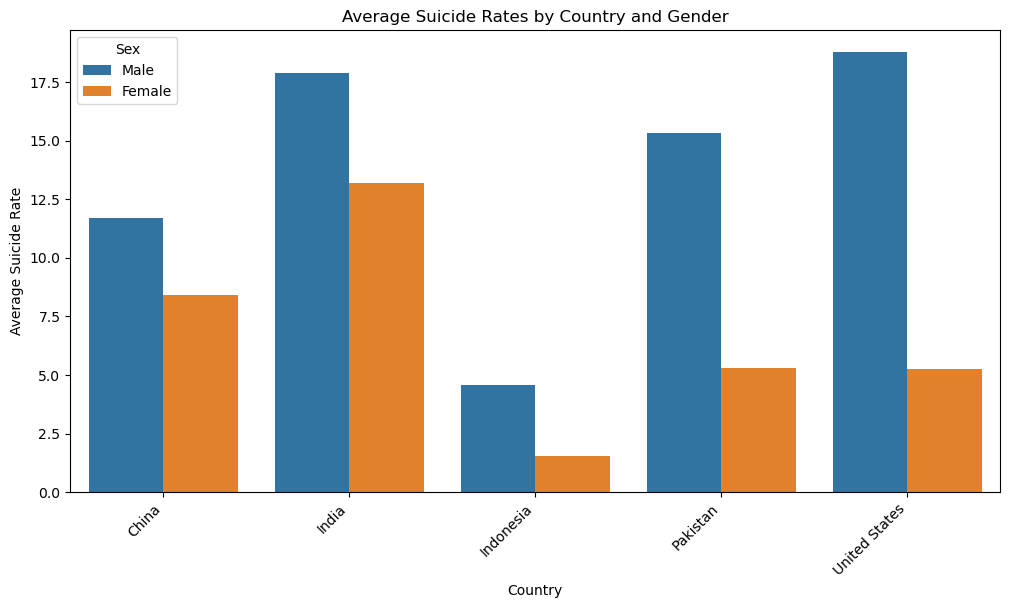

In [ ]:
# Create a barplot using seaborn
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Country', y='Average Suicide Rate', hue='Sex', data=final_df)
plt.title('Average Suicide Rates by Country and Gender')
plt.xticks(rotation=45, ha='right')

# Update legend labels
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['Male', 'Female'], title='Sex')

plt.show()

In [ ]:
df_cleaned_v2

,Country,Year,Age-standardized suicide rate - Sex: male,Age-standardized suicide rate - Sex: female,Population,Continent
0,Afghanistan,2000,7.6200,7.7700,19542986.0,NaN
1,Afghanistan,2001,7.8500,7.8900,19688634.0,NaN
2,Afghanistan,2002,7.9500,7.6900,21000258.0,NaN
3,Afghanistan,2003,7.7800,7.6000,22645136.0,NaN
4,Afghanistan,2004,7.8600,7.6200,23553554.0,NaN
...,...,...,...,...,...,...
3875,Zimbabwe,2015,47.3654,19.1859,14154937.0,Africa
3876,Zimbabwe,2016,44.4823,17.7111,14452705.0,NaN
3877,Zimbabwe,2017,41.3055,15.0037,14751101.0,NaN
3878,Zimbabwe,2018,38.5506,13.4846,15052191.0,NaN


In [ ]:
# Reading the Excel file containing country and continent
excel_file_path = r"C:\Users\shubh\OneDrive\Desktop\Data Analytics for Business\03_Sem\Capstone Project 1\00 Capstone dataset\FMT_Data\Countries_and_Continents.xlsx"
countries_continents_df = pd.read_excel(excel_file_path)

# Joining the dataframes based on the 'Country' column
merged_df = pd.merge(df_cleaned_v2, countries_continents_df, how='left', left_on='Country', right_on='Countries')

# Drop the duplicate 'Country' and 'Countries' column resulting from the merge operation
merged_df.drop(columns=['Countries'], inplace=True)
merged_df.drop(columns=['Continent_x'], inplace=True)

# Display the resulting merged dataframe
print(merged_df)



          Country  Year  Age-standardized suicide rate - Sex: male  \
0     Afghanistan  2000                                     7.6200   
1     Afghanistan  2001                                     7.8500   
2     Afghanistan  2002                                     7.9500   
3     Afghanistan  2003                                     7.7800   
4     Afghanistan  2004                                     7.8600   
...           ...   ...                                        ...   
3855     Zimbabwe  2015                                    47.3654   
3856     Zimbabwe  2016                                    44.4823   
3857     Zimbabwe  2017                                    41.3055   
3858     Zimbabwe  2018                                    38.5506   
3859     Zimbabwe  2019                                    37.8141   

      Age-standardized suicide rate - Sex: female  Population Continent_y  
0                                          7.7700  19542986.0        Asia  
1      

In [ ]:
merged_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3860 entries, 0 to 3859
Data columns (total 6 columns):
 #   Column                                       Non-Null Count  Dtype         
---  ------                                       --------------  -----         
 0   Country                                      3860 non-null   object        
 1   Year                                         3860 non-null   datetime64[ns]
 2   Age-standardized suicide rate - Sex: male    3860 non-null   float64       
 3   Age-standardized suicide rate - Sex: female  3860 non-null   float64       
 4   Population                                   3700 non-null   float64       
 5   Continent_y                                  3660 non-null   object        
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 211.1+ KB


In [ ]:
# Checking if 'Continent_y' exists in columns, else using 'Continent'
continent_column = 'Continent_y' if 'Continent_y' in df_cleaned_v2.columns else 'Continent'

# Grouping by 'Year' and 'Continent', calculating the mean of suicide rates for males and females
grouped_data_avg = df_cleaned_v2.groupby(['Year', continent_column]).agg({
    'Age-standardized suicide rate - Sex: male': 'mean',
    'Age-standardized suicide rate - Sex: female': 'mean'
}).reset_index()




In [ ]:
grouped_data_avg

,Year,Continent,Age-standardized suicide rate - Sex: male,Age-standardized suicide rate - Sex: female
0,2015,Africa,24.266202,6.947354
1,2015,Asia,10.630217,3.589850
2,2015,Europe,18.702958,4.886250
3,2015,North America,9.592695,2.522333
4,2015,Oceania,24.782880,6.589130
5,2015,South America,18.024200,5.015983
